# 이동통신사 고객 이탈 예측

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

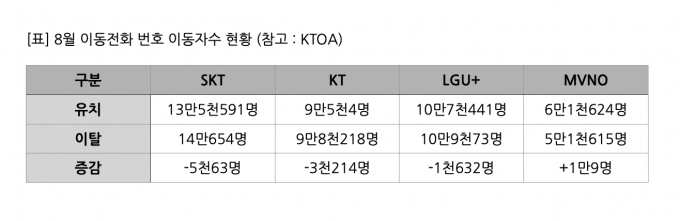

* 위에 그림과 같이 3사 이동통신사의 번호 이동자수가 감소하고, 오히려 알뜰폰의 번호이동건수가 증가 하였다.
* 알뜰폰의 경우 3사 통신사에 비해 가격이 매우 저렴하며 품질은 타 통신사와 비슷하다.
* 3사 통신사의 경우 멤버쉽이라는 혜택을 주고 있지만 혜택이 감소하여 중요성이 매우 낮아진 상태
 (통신사를 가입하지 않고도 돈을 내며 가입할 수 있는 구독형 서비스가 나타났다.)
* 5G 통신품질이 좋지않아 이탈하는 고객 발생
* 손쉽게 오픈마켓을 통하여 단말기 구매로 통신사를 끼고 구매하지 않는 경우가 많다.

* 위에 내용으로 보아 중요하게 생각 하는 것 1. 가격 2. 품질 3. 혜택

## 0.환경설정

### 1) 라이브러리 로딩

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split



import warnings

warnings.filterwarnings(action='ignore')

### 2) 데이터 로딩

In [25]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
data = pd.read_csv(data_path)
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,544,1,47711,183,17,730589.0,192,19,5,unsat,little,considering,0
1,689,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no,1
2,3134,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering,0
3,12523,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0
4,2374,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0) - 범주	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간비율(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	OVER_15MINS_CALLS_PER_MONTH	|	 평균 장기통화(15분 이상) 횟수	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' ) - 범주	|		|
|	REPORTED_USAGE_LEVEL	|	사용 수준 설문('very_little', 'little', 'avg', 'high', 'very_high') - 범주	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it') - 범주	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	**Target**	|


----

## 1.데이터 탐색

* 데이터 전처리하기전에 변수를 살펴보면 이탈과 관련되지 않는다고 생각 되는 부분은 집 가격, 연 수입액, 대학졸업 여부 라고 생각이 든다.

## 2.데이터 전처리 

In [26]:
target = 'CHURN' #이탈

### 2.1 데이터 정리

* feature와 , target으로 분할

In [27]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### 만족도설문

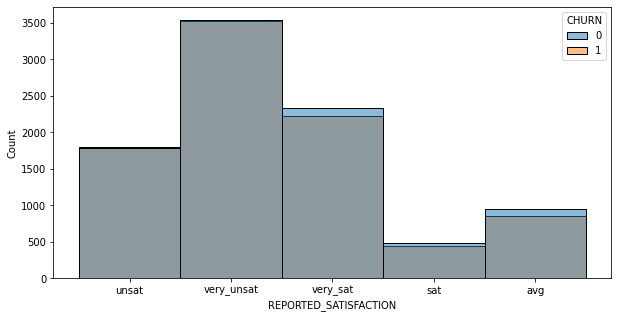

In [28]:
plt.figure(figsize = (10,5))

sns.histplot(data = data, x='REPORTED_SATISFACTION', bins = 10, hue = 'CHURN') # 만족도설문

plt.show()

* 만족도 설문을 보면 very_unsat과 very_sat이 두 개가 가장 높은편이다. 이걸 보면 매우 만족해도 나가고 매우 불만족도 나간다는 말이다. 그러면 이탈을 예측하기에는 사용하기 어려운 지표라고 생각이 든다.

### 사용수준설문조사

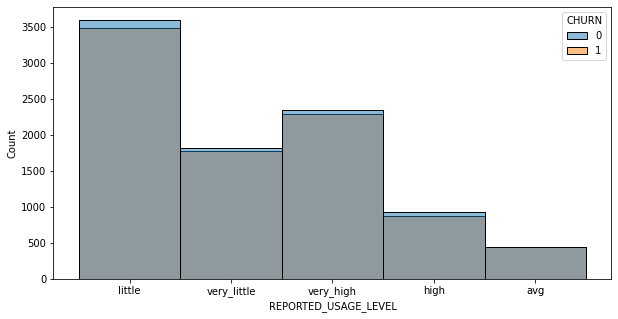

In [29]:
plt.figure(figsize = (10,5))

sns.histplot(data = data, x='REPORTED_USAGE_LEVEL', bins = 10, hue = 'CHURN') # 사용수준설문

plt.show()

* 사용 수준 설문에서는 위에 그래프와 같이 1이 0보다 높지않다. 
* 연속적이거나, 특별한 특징이 없기 때문에 이탈여부에 영향을 주지 않을 것으로 판단하여 삭제

### 평균 장기통화(15분) / 월 초과 사용시간(분)

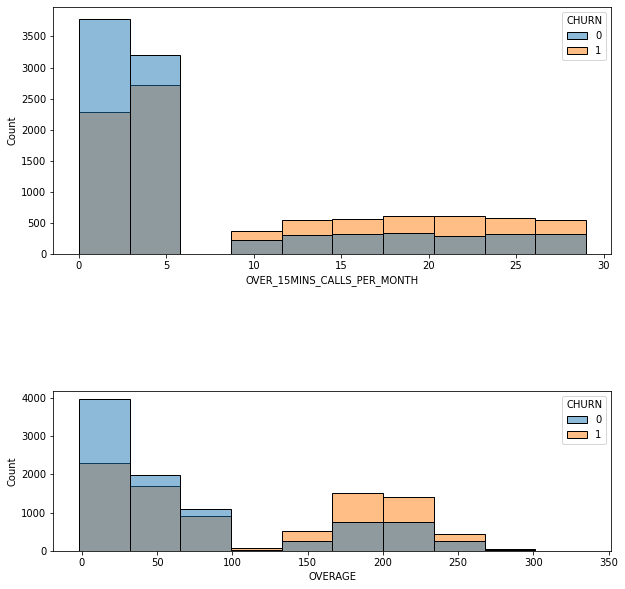

In [30]:
plt.figure(figsize = (10,10))

plt.subplot(2,1,1) # 평균 장기통화(15분) 횟수
sns.histplot(data = data, x='OVER_15MINS_CALLS_PER_MONTH', bins = 10, hue = 'CHURN')


plt.subplot(3,1,3)
sns.histplot(data = data, x='OVERAGE', bins = 10, hue = 'CHURN') # 월 초과 사용시간(분)



plt.show()

* 장기통화 횟수와 월 초과 사용시간이 모두 중간이상이 초과하면 이탈이 높아진다. 
* 이탈하는 이유를 생각해보면 초과하는 만큼 요금제를 바꾸기엔 비용이 비싸고 그래서 더 저렴한 통신사로 이탈한다고 생각이 든다.
* 두개는 비슷한 그림의 형상으로 보여 평균 장기통화(15분) 횟수는 삭제하도록 하였다.

### 대학졸업여부

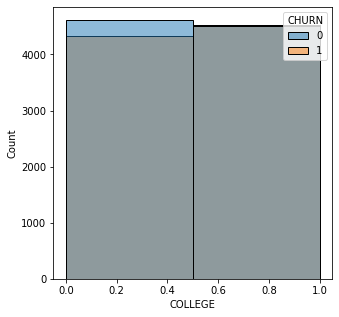

In [31]:
plt.figure(figsize = (5,5))

sns.histplot(data = data, x='COLLEGE', bins = 2, hue = 'CHURN') # 대학졸업여부

plt.show()

* COLLEGE 그래프를 보면, 대학 졸업여부와 이탈여부는 관련이 없는게 보여서 삭제하였다.


* id 데이터 또한 이탈예측하기 위해 불필요하다고 판단하여 삭제.

### 집 가격

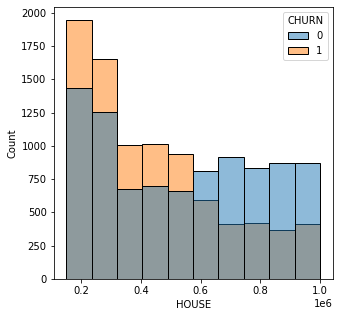

In [32]:
plt.figure(figsize = (5,5))

sns.histplot(data = data, x='HOUSE', bins = 10, hue = 'CHURN') # 집가격
plt.show()

* 집 가격은 이탈과 그리 연관이 없을 것이라 생각하였지만 저렴한 집에 사는 고객의 경우 더 저렴한 통신사를 찾아 이탈하는 것일까?

* 삭제 데이터 : 'id', 'OVER_15MINS_CALLS_PER_MONTH', 'REPORTED_USAGE_LEVEL' ,'COLLEGE'

In [33]:
drop_list = ['id', 'OVER_15MINS_CALLS_PER_MONTH', 'REPORTED_USAGE_LEVEL', 'COLLEGE']

x = x.drop(columns = drop_list, axis =1)


### 2.2 결측치에 대한 조치


In [34]:
x.isnull().sum()

INCOME                          0
OVERAGE                         0
LEFTOVER                        0
HOUSE                         215
HANDSET_PRICE                   0
AVERAGE_CALL_DURATION           0
REPORTED_SATISFACTION          38
CONSIDERING_CHANGE_OF_PLAN      0
dtype: int64

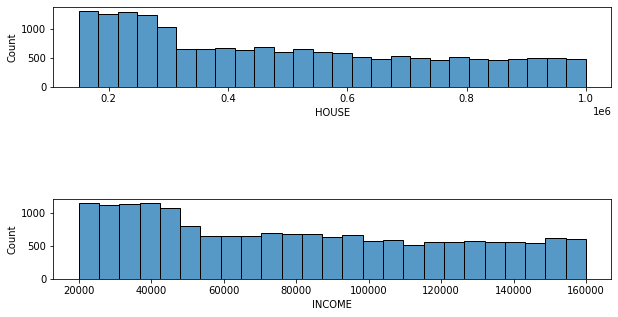

In [35]:
plt.figure(figsize = (10,5))

plt.subplot(3,1,1)
sns.histplot(x='HOUSE', data=data)

plt.subplot(3,1,3)
sns.histplot(x='INCOME', data=data)

plt.show()


* 금액적인 부분에서 INCOME과 HOUSE 비용을 그래프로 비교해보니, 평균적으로 모양이 매우 비슷하다. 
그래서 INCOME의 구간을 나누어 HOUSE 중간값을 넣었다.

In [36]:
bins = [20000,50000,80000,120000,160000]

group_names = ['20000-50000','50001-80000','80001-120000','120001-160000']

categorise = pd.cut(x['INCOME'],bins,labels=group_names)

x['Income_g'] = categorise

In [37]:
x['HOUSE'].fillna(x.groupby('Income_g')['INCOME'].transform('median'), inplace = True)

In [38]:
x.isnull().sum()

INCOME                         0
OVERAGE                        0
LEFTOVER                       0
HOUSE                          0
HANDSET_PRICE                  0
AVERAGE_CALL_DURATION          0
REPORTED_SATISFACTION         38
CONSIDERING_CHANGE_OF_PLAN     0
Income_g                       0
dtype: int64

* REPORTED_SATISFACTION의 경우 특별하게 이탈여부와 큰 관계가 없다고 생각이 들었고 가장 근접한 것을 채울 수있는 KNN을 사용하여 결측치를 제거 하였다.

* KNN은 가변수화 된 상태에서 사용이 가능하기 때문에, 가변수화 후 진행하였다.

In [41]:
x['REPORTED_SATISFACTION'].replace({'very_unsat':1,'unsat':2,'avg':3,'sat':4,'very_sat':5}, inplace=True)

* 1:매우불만족 2:불만족 3:보통 4:만족 5:매우만족

In [42]:
x['CONSIDERING_CHANGE_OF_PLAN'].replace({'actively_looking_into_it':1,'considering':2,'perhaps':3,'no':4,'never_thought':5}, inplace=True)

In [43]:
x = x[['INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION', 'CONSIDERING_CHANGE_OF_PLAN']]

In [44]:
x

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN
0,47711,183,17,730589.0,192,5,2.0,2
1,74132,191,43,535092.0,349,2,2.0,4
2,150419,0,14,204004.0,682,6,2.0,2
3,159567,0,58,281969.0,634,1,1.0,5
4,23392,0,0,216707.0,233,15,2.0,4
...,...,...,...,...,...,...,...,...
17995,31079,200,40,34783.5,181,11,2.0,1
17996,137194,63,0,140207.0,787,11,1.0,4
17997,82931,0,77,98343.5,232,2,1.0,5
17998,124391,0,19,140207.0,862,2,2.0,4


In [45]:
# KNN Imputer
from sklearn.impute import KNNImputer

In [46]:
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(x)

x = pd.DataFrame(imputed, columns=x.columns)
x.isna().sum()

INCOME                        0
OVERAGE                       0
LEFTOVER                      0
HOUSE                         0
HANDSET_PRICE                 0
AVERAGE_CALL_DURATION         0
REPORTED_SATISFACTION         0
CONSIDERING_CHANGE_OF_PLAN    0
dtype: int64

### 2.5 데이터 분할

In [47]:
# data ==> train, test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=3000, random_state = 2022)

In [48]:
# train ==> train : val
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=3000, random_state = 2022)

### 2.6 스케일링 

In [49]:
# from sklearn.preprocessing import StandardScaler

# col_x = list(x)
# scaler = StandardScaler()
# x_train_s = scaler.fit_transform(x_train)
# x_val_s= scaler.transform(x_val)
# x_test_s = scaler.transform(x_test)

In [50]:
from sklearn.preprocessing import MinMaxScaler

col_x = list(x)
scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s= scaler.transform(x_val)
x_test_s = scaler.transform(x_test)

## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* **꼭 필요한 라이브러리 혹은 함수**만 불러옵니다. 무조건 다 불러오는 것은 지양해주세요.

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


### 3.2 모델링

#### (1) Logistic Regression 모델링

In [53]:
model1 = LogisticRegression(max_iter=700) #max_iter Gradient Descent 방식 몇번 할 건지

In [54]:
model1.fit(x_train, y_train)

LogisticRegression(max_iter=700)

In [55]:
print(list(x))
print(model1.coef_) #가중치(기울기)
print(model1.intercept_) #편향(절편)

['INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE', 'AVERAGE_CALL_DURATION', 'REPORTED_SATISFACTION', 'CONSIDERING_CHANGE_OF_PLAN']
[[ 3.02521356e-06  5.94042472e-03  6.88095456e-04 -1.85794765e-06
   3.22713465e-04  1.85456280e-05  3.78396181e-06  1.69910674e-05]]
[5.31243081e-06]


In [56]:
y_pred1 = model1.predict(x_val) # y_pred1 = model1.predict(x_test)

In [57]:
print(confusion_matrix(y_val,y_pred1))
print('-'*50)
print('-'*50)
print(classification_report(y_val, y_pred1))

[[980 540]
 [556 924]]
--------------------------------------------------
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1520
           1       0.63      0.62      0.63      1480

    accuracy                           0.63      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.63      0.63      0.63      3000



In [58]:
print('-'*50)

--------------------------------------------------


In [59]:
print(confusion_matrix(y_test,y_pred1))
print('-'*50)
print('-'*50)
print(classification_report(y_test, y_pred1))

[[806 734]
 [730 730]]
--------------------------------------------------
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1540
           1       0.50      0.50      0.50      1460

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000



In [60]:
result = {}

In [61]:
accuracy_score1 = accuracy_score(y_val,y_pred1)

In [62]:
result['Logistic Regression'] = accuracy_score1

In [63]:
print(result['Logistic Regression'])

0.6346666666666667


#### (2) KNN

In [64]:
model2 = KNeighborsClassifier()

In [65]:
model2.fit(x_train_s, y_train)

KNeighborsClassifier()

In [66]:
y_pred2 = model2.predict(x_val_s) #y_pred2 = model2.predict(x_test_s)

In [67]:
print(confusion_matrix(y_val,y_pred2))
print('-'*50)
print('-'*50)
print(classification_report(y_val, y_pred2))

[[1016  504]
 [ 553  927]]
--------------------------------------------------
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1520
           1       0.65      0.63      0.64      1480

    accuracy                           0.65      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.65      0.65      0.65      3000



In [68]:
print('-'*50)

--------------------------------------------------


In [69]:
print(confusion_matrix(y_test,y_pred2))
print('-'*50)
print('-'*50)
print(classification_report(y_test, y_pred2))

[[814 726]
 [755 705]]
--------------------------------------------------
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.53      0.52      1540
           1       0.49      0.48      0.49      1460

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000



In [70]:
accuracy_score2 = accuracy_score(y_val,y_pred2)

In [71]:
result['KNN'] = accuracy_score2

In [72]:
print(result['KNN'])

0.6476666666666666


#### (3) SVM 모델링

In [73]:
model3 = SVC() 

In [74]:
model3.fit(x_train_s, y_train)

SVC()

In [75]:
y_pred3 = model3.predict(x_val_s) 

In [76]:
print(confusion_matrix(y_val,y_pred3))
print('-'*50)
print('-'*50)
print(classification_report(y_val, y_pred3))

[[1086  434]
 [ 476 1004]]
--------------------------------------------------
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1520
           1       0.70      0.68      0.69      1480

    accuracy                           0.70      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.70      0.70      0.70      3000



In [77]:
print('-'*50)

--------------------------------------------------


In [78]:
print(confusion_matrix(y_test,y_pred3))
print('-'*50)
print('-'*50)
print(classification_report(y_test, y_pred3))

[[802 738]
 [760 700]]
--------------------------------------------------
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.52      0.52      1540
           1       0.49      0.48      0.48      1460

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



In [79]:
accuracy_score3 = accuracy_score(y_val,y_pred2)

In [80]:
result['SVM'] = accuracy_score3

In [81]:
print(result['SVM'])

0.6476666666666666


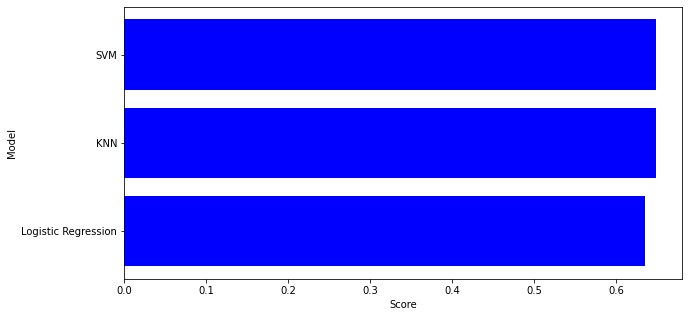

In [83]:
plt.figure(figsize=(10,5))
plt.barh(y=list(result), width=result.values(), color ='blue')
plt.xlabel('Score')
plt.ylabel('Model')
plt.show()

## 4.모델링2 : DL

### 4.1 모델링을 위한 함수 불러오기

In [84]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from tensorflow.keras.callbacks import EarlyStopping

### 4.2 모델링
  

#### (1) 모델1

In [85]:
#1

keras.backend.clear_session()

model_dl = keras.models.Sequential()

model_dl.add(keras.layers.Input(shape=(x_train.shape[1],)))

model_dl.add(keras.layers.Dense(64, activation = 'relu'))
model_dl.add(keras.layers.Dense(1,activation = 'sigmoid'))

model_dl.compile(loss='binary_crossentropy', optimizer ='adam',metrics = ['accuracy'])

model_dl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


#### (2) 모델2

In [86]:
#2

keras.backend.clear_session()

model_dl2 = keras.models.Sequential()

model_dl2.add(keras.layers.Dense(128,input_shape =(x_train.shape[1],), activation = 'relu'))
model_dl2.add(keras.layers.Dense(64,name='hidden_layer1', activation = 'relu'))
model_dl2.add(keras.layers.Dense(48, activation = 'relu'))
model_dl2.add(keras.layers.Dense(1,activation = 'sigmoid'))

model_dl2.compile(loss='binary_crossentropy', optimizer ='adam',metrics = ['accuracy'])

model_dl2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 hidden_layer1 (Dense)       (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 48)                3120      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 12,577
Trainable params: 12,577
Non-trainable params: 0
_________________________________________________________________


#### (3) 모델3

In [87]:
#3

keras.backend.clear_session()

model_dl3 = keras.models.Sequential()

model_dl3.add(keras.layers.Dense(512,input_shape =(x_train.shape[1],), activation = 'relu'))
model_dl3.add(keras.layers.Dense(512, activation = 'relu'))
model_dl3.add(keras.layers.Dense(256, activation = 'relu'))
model_dl3.add(keras.layers.Dense(256, activation = 'relu'))
model_dl3.add(keras.layers.Dense(128, activation = 'relu'))
model_dl3.add(keras.layers.Dense(128, activation = 'relu'))
model_dl3.add(keras.layers.Dense(64, activation = 'relu'))
model_dl3.add(keras.layers.Dense(1,activation = 'sigmoid'))

model_dl3.compile(loss='binary_crossentropy', optimizer ='adam',metrics = ['accuracy'])


model_dl3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 dense_6 (Dense)             (None, 64)                8

#### (4) 추가

In [88]:
#4

keras.backend.clear_session()

model_dl4 = keras.models.Sequential()

model_dl4.add(keras.layers.Input(shape=(x_train.shape[1],)))
model_dl4.add(keras.layers.Dense(1,activation = 'sigmoid'))

model_dl4.compile(loss='binary_crossentropy', optimizer ='adam',metrics = ['accuracy'])

model_dl4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


#### (5) 추가

In [89]:
#5

keras.backend.clear_session()

il_1 = keras.layers.Input(shape=(x_train.shape[1],))
hl_1 = keras.layers.Dense(48,activation= 'relu')(il_1)
hl_1 = keras.layers.Dense(48,activation= 'relu')(hl_1)
ol_1 = keras.layers.Dense(1, activation = 'sigmoid')(hl_1)

model_f = keras.models.Model(il_1,ol_1)

model_f.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

model_f.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 48)                432       
                                                                 
 dense_1 (Dense)             (None, 48)                2352      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 2,833
Trainable params: 2,833
Non-trainable params: 0
_________________________________________________________________


#### (6) 추가

In [90]:
#6

keras.backend.clear_session()

il_2 = keras.layers.Input(shape=(x_train.shape[1],))
hl_2 = keras.layers.Dense(128,activation = 'relu')(il_2)
hl_2 = keras.layers.Dense(64,activation = 'relu')(hl_2)
hl_2 = keras.layers.Dense(48,activation = 'relu')(hl_2)
ol_2 = keras.layers.Dense(1, activation = 'sigmoid')(hl_2)

model_f2 = keras.models.Model(il_2,ol_2)

model_f2.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = ['accuracy'])

model_f2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 48)                3120      
                                                                 
 dense_3 (Dense)             (None, 1)                 49        
                                                                 
Total params: 12,577
Trainable params: 12,577
Non-trainable params: 0
_________________________________________________________________


In [91]:
# es
es = EarlyStopping(monitor = 'val_loss', # 무엇을관찰
                   min_delta = 0,            # 0이면,나빠지지많으면가능
                   patience = 5,             # 참음
                   verbose = 0,              
                   restore_best_weights=True # 학습과정중에 최적의 가중치저장
                  )

In [92]:
# 학습
#1
hist1 = model_dl.fit(x_train_s , y_train, epochs = 500, verbose =0, batch_size=128,validation_split= 0.2, callbacks=[es])
pred_dl = model_dl.predict(x_val_s)

2022-09-01 15:28:23.335538: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


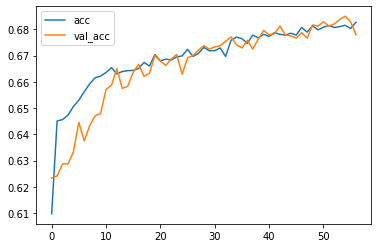

In [93]:
plt.plot( hist1.history['accuracy'], label='acc' )
plt.plot( hist1.history['val_accuracy'], label = 'val_acc' )

plt.legend()
plt.show()

In [94]:
#2
hist2=model_dl2.fit(x_train_s , y_train, epochs = 500, verbose =0, batch_size=128, validation_split=0.2,callbacks = [es])
pred_dl2 = model_dl2.predict(x_val_s)


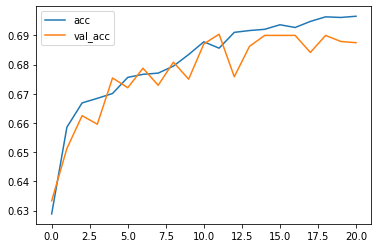

In [95]:
plt.plot( hist2.history['accuracy'], label='acc' )
plt.plot( hist2.history['val_accuracy'], label = 'val_acc' )

plt.legend()
plt.show()

In [96]:
#3
hist3=model_dl3.fit(x_train_s , y_train, epochs = 100, verbose =0, batch_size=128,  validation_split=0.2,callbacks = [es])
pred_dl3 = model_dl3.predict(x_val_s)


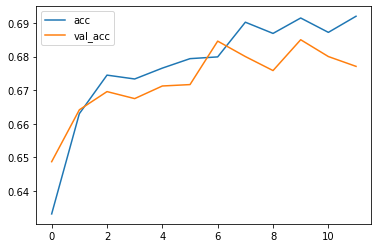

In [97]:
plt.plot( hist3.history['accuracy'], label='acc' )
plt.plot( hist3.history['val_accuracy'], label = 'val_acc' )

plt.legend()
plt.show()

In [98]:
#4
hist4=model_dl4.fit(x_train_s , y_train, epochs = 500, verbose =0,batch_size=128, validation_split=0.2,callbacks = [es])
pred_dl4 = model_dl4.predict(x_val_s)

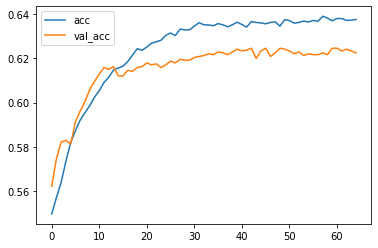

In [99]:
plt.plot( hist4.history['accuracy'], label='acc' )
plt.plot( hist4.history['val_accuracy'], label = 'val_acc' )

plt.legend()
plt.show()

In [100]:
#5
hist5=model_f.fit(x_train_s , y_train, epochs = 500, verbose =0,batch_size=128, validation_split=0.2,callbacks = [es])
pred_f = model_f.predict(x_val_s)


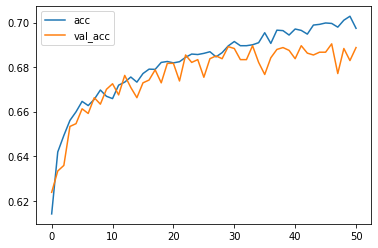

In [101]:
plt.plot( hist5.history['accuracy'], label='acc' )
plt.plot( hist5.history['val_accuracy'], label = 'val_acc' )

plt.legend()
plt.show()

In [102]:
#6
hist6=model_f2.fit(x_train_s , y_train, epochs = 500, verbose =0,batch_size=128, validation_split=0.2,callbacks = [es])
pred_f2 = model_f2.predict(x_val_s)


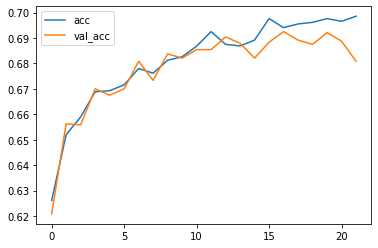

In [103]:
plt.plot( hist6.history['accuracy'], label='acc' )
plt.plot( hist6.history['val_accuracy'], label = 'val_acc' )

plt.legend()
plt.show()

## 5.성능 비교


### 5.1 평가지표 결정


In [104]:
y.value_counts()

0    9131
1    8869
Name: CHURN, dtype: int64

* 데이터가 균형있게 0,1로 나눠져있고 한쪽으로 치우쳐있지않아서 f1-score는 제외하도록 하였다.
* 그러면, precision / recall/ Accuracy를 비교해야하는데 이탈을 예측해야하는 것이라 실제로 이탈한 것을 예측하는 것 보단
* 이탈을 예측할 고객이 실제로 이탈할 확률을 구하는 것이 더 타당하다고 생각하여 일단 recall은 배제하였다.

* 두번 째로, pre /acc 를 비교해 보자면 pre는 positive -> positive한 것으로 예측하는것이고
* acc의 경우에는 정분류율로 전체 중에서 Po/Ne를 정확하게 예측한 비율이다.

* 1. 이탈은 정확한 것도 중요하고 근접성도 동시에 측정이 가능해야한다.
* 2. 실제 측정을 기반으로 하는 것이 중요하다.
* 3. 정밀한 것은 자체로는 정확하다는 것을 의미 하지 않다.

* => 결론적으로 accuracy를 성능을 비교할 것이다.

### 5.2 성능 비교

In [106]:
#머신러닝
#1 Logistic Re
print(confusion_matrix(y_val,y_pred1))
print('-'*50)
print('-'*50)
print(classification_report(y_val, y_pred1))

[[980 540]
 [556 924]]
--------------------------------------------------
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1520
           1       0.63      0.62      0.63      1480

    accuracy                           0.63      3000
   macro avg       0.63      0.63      0.63      3000
weighted avg       0.63      0.63      0.63      3000



In [107]:
#2 KNN
print(confusion_matrix(y_val,y_pred2))
print('-'*50)
print('-'*50)
print(classification_report(y_val, y_pred2))

[[1016  504]
 [ 553  927]]
--------------------------------------------------
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1520
           1       0.65      0.63      0.64      1480

    accuracy                           0.65      3000
   macro avg       0.65      0.65      0.65      3000
weighted avg       0.65      0.65      0.65      3000



In [108]:
#3 SVM
print(confusion_matrix(y_val,y_pred3))
print('-'*50)
print('-'*50)
print(classification_report(y_val, y_pred3))

[[1086  434]
 [ 476 1004]]
--------------------------------------------------
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1520
           1       0.70      0.68      0.69      1480

    accuracy                           0.70      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.70      0.70      0.70      3000



In [109]:
#딥러닝
#1
pred_dl = np.where(pred_dl >= .5, 1, 0)
print(classification_report(y_val, pred_dl))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1520
           1       0.69      0.66      0.68      1480

    accuracy                           0.69      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.69      0.69      0.69      3000



In [110]:
#2
pred_dl2 = np.where(pred_dl2 >= .5, 1, 0)
print(classification_report(y_val, pred_dl2))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70      1520
           1       0.69      0.72      0.71      1480

    accuracy                           0.70      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.70      0.70      0.70      3000



In [111]:
from tensorflow.keras.utils import plot_model

In [112]:
plot_model(model_dl2, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [113]:
#3
pred_dl3 = np.where(pred_dl3 >= .5, 1, 0)
print(classification_report(y_val, pred_dl3))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      1520
           1       0.69      0.70      0.69      1480

    accuracy                           0.69      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.69      0.69      0.69      3000



In [114]:
#4
pred_dl4 = np.where(pred_dl4 >= .5, 1, 0)
print(classification_report(y_val, pred_dl4))

              precision    recall  f1-score   support

           0       0.65      0.66      0.65      1520
           1       0.64      0.63      0.64      1480

    accuracy                           0.64      3000
   macro avg       0.64      0.64      0.64      3000
weighted avg       0.64      0.64      0.64      3000



In [115]:
#5
pred_f = np.where(pred_f >= .5, 1, 0)
print(classification_report(y_val, pred_f))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1520
           1       0.69      0.69      0.69      1480

    accuracy                           0.69      3000
   macro avg       0.69      0.69      0.69      3000
weighted avg       0.70      0.69      0.70      3000



In [116]:
#6
pred_f2 = np.where(pred_f2 >= .5, 1, 0)
print(classification_report(y_val, pred_f2))

              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1520
           1       0.71      0.66      0.68      1480

    accuracy                           0.70      3000
   macro avg       0.70      0.70      0.70      3000
weighted avg       0.70      0.70      0.70      3000




* SVM, DL2,3,6의 모델이 비슷한 결과가 나왔다.
* 여기서 비슷한결과라서 precision과 recall, f1까지 함께 보면 딥러닝6번 의 결과가 가장 좋게 나왔다.
* 딥러닝6번의 경우, functional API를 사용하였고, hl를 3가지를 추가하였다 노드는 2의배수를 사용하였고 너무 높고 많이 하는 것보단 적당한 갯수가 결과가 잘나온다고 생각하여 적은 노드를 사용하였다.
* 그리고 fit에서 metrix에 accurcy를 추가하여 자동으로 loss 감지하도록 하였다.
* es를 사용하여 epochs를 500번까지 늘렸고, 최적의 가중치를 찾기위해 restore를 True로 설정하였다. 
* 결론적으로, 값은 0.8이상을 원했지만 이루지 못하였고 그거에 대한 노트나 히든레이어 수정과 함께 es에서 변수 조정이 필요하다고 생각이든다.


### 5.3 추가 분석 및 의견

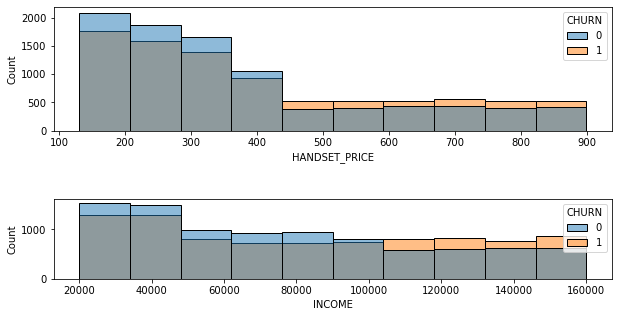

In [98]:
plt.figure(figsize = (10,5))

plt.subplot(2,1,1)
sns.histplot(data = data, x='HANDSET_PRICE', bins = 10, hue = 'CHURN')

plt.subplot(3,1,3)
sns.histplot(data = data, x='INCOME', bins = 10, hue = 'CHURN')

plt.show()

* 위의 두개의 그래프는 비슷한 형태를 나타낸다. 둘 다 뒤로 갈 수록 이탈율이 높아진다.
* 그렇다는 것은 고가의 핸드폰을 쓰고 , 고수입인 고객은 이탈을 할까? 라고 생각하여 그룹화 하여 그래프를 그려보았다.

In [100]:
data2 = data
bins = [130,219,326,536,899]

group_names = ['130-219','220-326','327-536','537-899']

categorise = pd.cut(data2['HANDSET_PRICE'],bins,labels=group_names)

data2['hand_pr'] = categorise

In [101]:
mo2 =data2.groupby('hand_pr')['INCOME'].agg(**{'mean_INCOME':'mean'}).reset_index() 

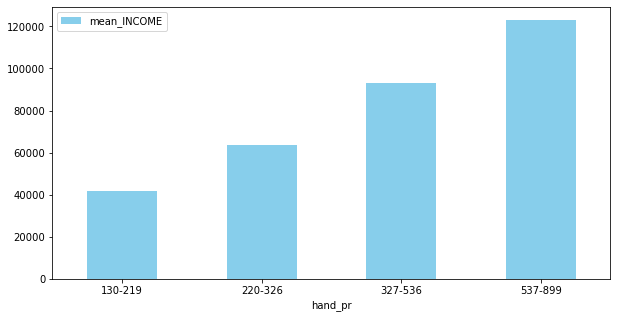

In [102]:
mo2.plot.bar(x="hand_pr", y="mean_INCOME", rot=0, fontsize=10, figsize = (10,5), color ='skyblue')

plt.show()

* 그래프를 보면 비싼핸드폰을 쓰는 사람들의 연수입은 역시 상당히 높았다. 
* 대략적으로 같은 수치로 상승하고 있으며, 선형적인 그래프를 보인다.
* 그래서 이 그룹들의 이탈을 확인해 보았다.

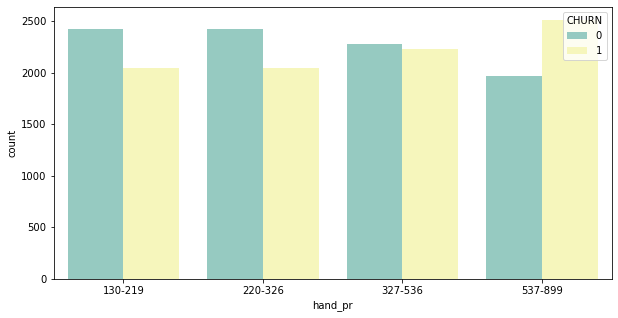

In [104]:
plt.subplots(figsize=(10,5))
sns.countplot(x="hand_pr", data=data2, hue = 'CHURN', palette = 'Set3')
plt.show()

* 그래프를 그려보니 역시 고가의 핸드폰 537~899($)를 쓰는 고객들의 이탈율이 높았다.
* 고가 핸드폰을 쓰고 고소득의 고객들은 어떻게 해야 이탈을 막을 수 있을까?

* 생각해보자면 고소독과 비싼핸드폰을 쓰는 고객들은 가격할인이나, 요금제할인은 신경을 별로 안쓸 것이다.
* 그러면, 다른 혜택을 주는게 좋을 것같다. 예를 들면, 백화점이나 핫플레이스등을 선정하여 혜택을 주는 것이다.
* 요즘은 TV매체보다는 SNS 매체를 통하여 인기가 많고 없음을 판단해준다. 그럼 이런 백화점이나 핫플레이스에 관련하여 혜택을 준다면
* 고소득층 고객들을 이탈을 방지할 수 있을 것이다. 또한, 고소득층을 위한 카드사와의 결합으로 멤버십을 출시하여 특별함을 강조하고 희귀성에 중점을 두는 것이 좋다고 생각한다.

* 국내 통신사의 경우 새로운 구독서비스를 출시하였다.
* SK의 경우는 탈통신사 구독서비스를 하여서, 통신사에 상관없이 월 구독료를 내고 가입이 가능하다.
* 대신 LG의 경우에는 VIP/VVIP에 대한 구독서비를 출시하였고, 이에 대한 반응이 매우 좋다.

* 중저소득층 고객들도 낮은편은 아니지만, 이탈을 방지하기위해서 새로운 저가 요금제 출시 및 여러가지 형태로 요금제를 출시하여 고객들에게 다양한 접근이 가능하도록 해주어야한다.
* 중저소득층 고객들의 경우 핸드폰 구입에 대해서 부담이 적게 되도록 타 통신사 보다 더 많은 지원금을 지원하여 고객의 부담을 줄여주면, 이탈방지가 가능할 것으로 보인다.


### 비즈니스 문제 해결을 위해서 더 해볼 수 있는 것은 무엇인가요?

- 여기엔 없지만 고객들의 요금제와 요금제의 만족도를 조사하면 좋을 것 같다.
- 만족도 조사나 설문을 하게 된다면, 고객들의 참여를 높이기 위해 약간의 선물 같은 것을 제공한다면 더 실속있는 결과가 나타날 것이다.
- 생각보다 만족도 조사에서는 따로보게된다면, 그렇게 잘 나온 조사는 아니라고 생각이 든다. 그래서 만족도 2개를 그룹화하거나 새로운 열을 추가하여 그래프를 만들어보면 더 좋은 값이 나올 것 같다.
